## Marketing Analytics

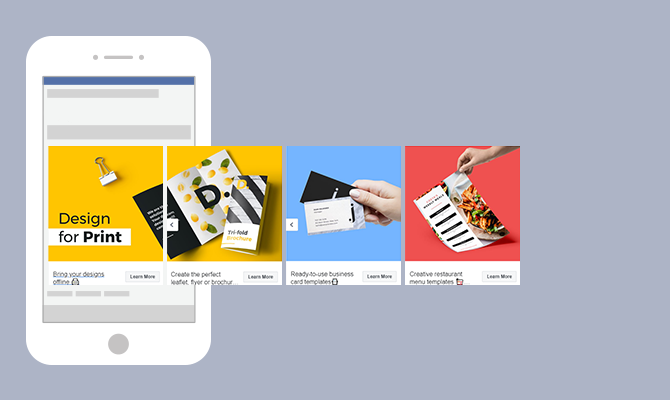

In [1]:
from IPython.display import Image
Image(filename='marketing.png', width=500, height=200)

### Introduction
This notebook will accomplish the following task:

#### Overall goal:
You're a marketing analyst and you've been told by the Chief Marketing Officer that recent marketing campaigns have not been as effective as they were expected to be. You need to analyze the data set to understand this problem and propose data-driven solutions.

#### Section 01: Exploratory Data Analysis

Are there any null values or outliers? How will you wrangle/handle them?
Are there any variables that warrant transformations?
Are there any useful variables that you can create with the given data?
Do you notice any patterns or anomalies in the data? Can you plot them?
Which marketing campaign is most successful?

#### Section 02: Statistical Analysis
Please run statistical tests in the form of regressions to answer these questions & propose data-driven action recommendations to your CMO. Make sure to interpret your results with non-statistical jargon so your CMO can understand your findings.

What factors are significantly related to the number of store purchases?
Does US fare significantly better than the Rest of the World in terms of total purchases?
Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test
Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)
Is there a significant relationship between geographical regional and success of a campaign?

#### Section 03: Data Visualization
Please plot and visualize the answers to the below questions.

What does the average customer look like for this company?
Which products are performing best?
Which channels are underperforming?

In [56]:
import pandas as pd
pd.options.display.max_columns = None
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import date
from tabulate import tabulate

In [3]:
# creating the date object of today's date
todays_date = date.today()

In [4]:
df = pd.read_csv('marketing_data.csv')

In [5]:
# Removing white spaces from column names.
df.columns = df.columns.str.replace(' ', '')

In [6]:
# Removing $ sign from Income field.
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '').astype('float')
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,57091.0,0,0,6/15/14,0,464,5,64,7,0,37,1,7,3,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,67267.0,0,1,5/13/14,0,134,11,59,15,2,30,1,3,2,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,32474.0,1,1,5/11/14,0,10,0,1,0,0,0,1,1,0,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,21474.0,1,0,4/8/14,0,6,16,24,11,0,34,2,3,1,2,7,1,0,0,0,0,1,0,SP


### Section 01: Exploratory Data Analysis

#### Are there any null values or outliers? How will you wrangle/handle them?

- Yes there are some null values. There are a 24 null values in the Income field.
- We can handle handle these null values by either dropping rows of data in the other fields so they match up with the income field or we can take take the average income and replace the missing values with that value.
- In this case we'll use the fill in the 24 null values with the median income amount.
- For outliers, we can check for those using a box and whisker plot.

In [7]:
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2216.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,8/31/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,25173.076661,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35303.000000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,51381.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,68522.000000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


In [28]:
# Filling in missing income values with median income amount.
df['Income'] = df['Income'].fillna(df['Income'].mean())

In [30]:
# Below we can see that all the fields have the same number of values.
df.describe(include='all')

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
count,2240.000000,2240.000000,2240,2240,2240.000000,2240.000000,2240.000000,2240,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240
unique,NaN,NaN,5,8,NaN,NaN,NaN,663,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8
top,NaN,NaN,Graduation,Married,NaN,NaN,NaN,8/31/12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,SP
freq,NaN,NaN,1127,864,NaN,NaN,NaN,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1095
mean,5592.159821,1968.805804,NaN,NaN,52247.251354,0.444196,0.506250,NaN,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375,NaN
std,3246.662198,11.984069,NaN,NaN,25037.797168,0.538398,0.544538,NaN,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391,NaN
min,0.000000,1893.000000,NaN,NaN,1730.000000,0.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,2828.250000,1959.000000,NaN,NaN,35538.750000,0.000000,0.000000,NaN,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,5458.500000,1970.000000,NaN,NaN,51741.500000,0.000000,0.000000,NaN,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,8427.750000,1977.000000,NaN,NaN,68289.750000,1.000000,1.000000,NaN,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN


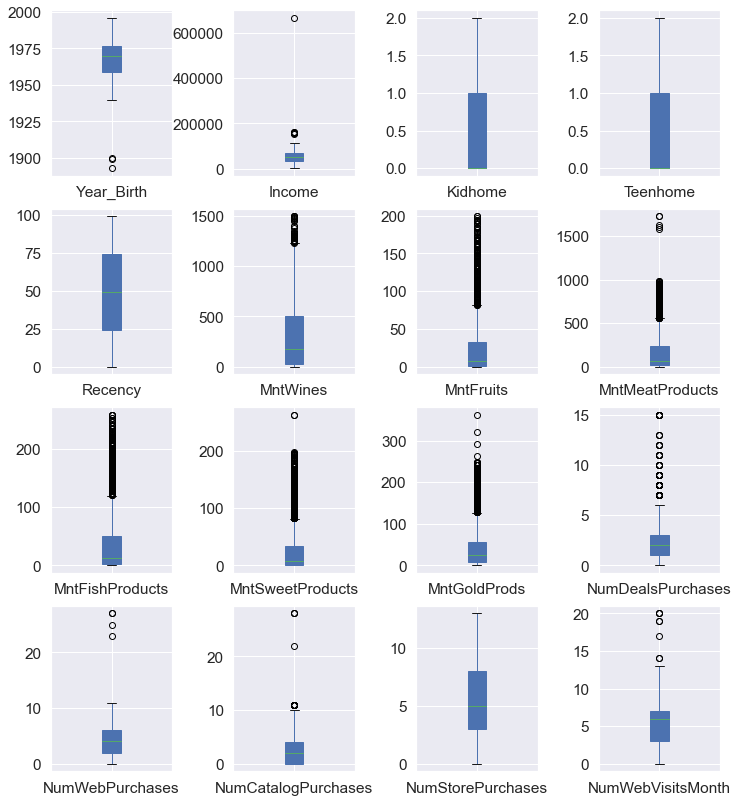

In [61]:
# Checking for outliers in the data using a box and whisker plot.

# Here we're selecting the columns we don't want to check outliers for. 
df_to_plot = df.drop(columns=['ID', 'AcceptedCmp1', 'AcceptedCmp2', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'Response', 'Complain']).select_dtypes(include=np.number)

# Mapping out the data using a box and whisker plot. 
df_to_plot.plot(subplots=True, layout=(4,4), kind='box', figsize=(12,14), patch_artist=True)
plt.subplots_adjust(wspace=0.5);

# Below we can see multiple outliers in many of the fields such as Year_Birth, MntMeatProducts and NumWebVisitsMonth.
# Not sure we need to drop any of the outliers as they all seem acceptable.
# Year_Birth seems a little hocking but it's possible for people to live over a 100 years. 
# Income is fine and are the other variables. 

#### Are there any variables that warrant transformations?

- Nothing that I can see at the moment.

#### Are there any useful variables that you can create with the given data?

- Total_Amount_Spent = The total amount that a customer spent on their purchase.
- Total_Purchases = The total number of purchases that a customer made.
- Total_Campaigns_Accepted = The total number of offers a customer accepted.
- Age = The age of the customer.
- Total_Dependents = The total number of dependents a customer has.

In [67]:
# Creating the Total_Amount_Spent field.
df['Total_Amount_Spent'] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']

In [69]:
# Checking that the Total_Amount_Spent field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalMnt,Total_Amount_Spent
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,1190


In [70]:
# Creating the Total_Amount_Spent field.
df['Total_Purchases'] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']

In [71]:
# Checking that the Total_Purchases field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalMnt,Total_Amount_Spent,Total_Purchases
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,1190,15


In [72]:
# Creating the Total_Campaigns_Accepted field.
df['Total_Campaigns_Accepted'] = df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5'] + df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['Response']

In [73]:
# Checking that the Total_Campaigns_Accepted field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalMnt,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,1190,15,1


In [74]:
# Creating the Age field.
df['Age'] = todays_date.year - df['Year_Birth']

In [75]:
# Checking that the Age field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalMnt,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Age
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,1190,15,1,51


In [78]:
# Creating the Total_Dependents field.
df['Total_Dependents'] = df['Kidhome'] + df['Teenhome']

In [79]:
# Checking that the Total_Dependents field was created.
df.head(1)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,TotalMnt,Total_Amount_Spent,Total_Purchases,Total_Campaigns_Accepted,Age,Total_Dependents
0,1826,1970,Graduation,Divorced,84835.0,0,0,6/16/14,0,189,104,379,111,189,218,1,4,4,6,1,0,0,0,0,0,1,0,SP,1190,1190,15,1,51,0


#### Do you notice any patterns or anomalies in the data? Can you plot them?

#### Which marketing campaign is most successful?

It would be the response campaign as 15% of customers accept an offer from that campaign.

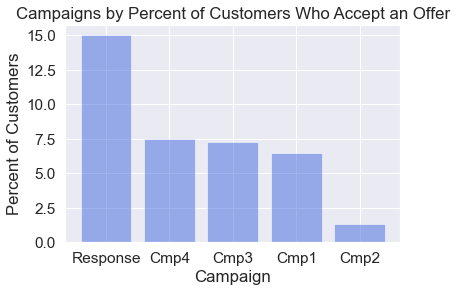

In [48]:
objects = ('Response', 'Cmp4', 'Cmp3', 'Cmp1', 'Cmp2')
y_pos = np.arange(len(objects))
performance = [15,7.5,7.3,6.5,1.3]

plt.bar(y_pos, performance, align='center', alpha=0.5,  color='royalblue')
plt.xticks(y_pos, objects)
plt.xlabel('Campaign')
plt.ylabel('Percent of Customers')
plt.title('Campaigns by Percent of Customers Who Accept an Offer')
# plt.grid(color='#95a5a6', linestyle='--', linewidth=2, axis='y', alpha=0.9)
plt.show()

In [32]:
# Calculating the percent of customers who accepted an offer after the last campaign. Here we can see that it's 15% 
# This is the most successful campaign.
df['Response'].value_counts(normalize=True)

0    0.850893
1    0.149107
Name: Response, dtype: float64

In [33]:
# Calculating the percent of customers who accepted an offer after the first campaign. Here we can see that it's 6.5%
df['AcceptedCmp1'].value_counts(normalize=True)

0    0.935714
1    0.064286
Name: AcceptedCmp1, dtype: float64

In [34]:
# Calculating the percent of customers who accepted an offer after the second campaign. Here we can see that it's 1.3%
df['AcceptedCmp2'].value_counts(normalize=True)

0    0.986607
1    0.013393
Name: AcceptedCmp2, dtype: float64

In [35]:
# Calculating the percent of customers who accepted an offer after the third campaign. Here we can see that it's 7.3%
df['AcceptedCmp3'].value_counts(normalize=True)

0    0.927232
1    0.072768
Name: AcceptedCmp3, dtype: float64

In [36]:
# Calculating the percent of customers who accepted an offer after the fourth campaign. Here we can see that it's 7.5%
df['AcceptedCmp4'].value_counts(normalize=True)

0    0.925446
1    0.074554
Name: AcceptedCmp4, dtype: float64

### Section 02: Statistical Analysis

#### What factors are significantly related to the number of store purchases?

#### Does US fare significantly better than the Rest of the World in terms of total purchases?

#### Your supervisor insists that people who buy gold are more conservative. Therefore, people who spent an above average amount on gold in the last 2 years would have more in store purchases. Justify or refute this statement using an appropriate statistical test

#### Fish has Omega 3 fatty acids which are good for the brain. Accordingly, do "Married PhD candidates" have a significant relation with amount spent on fish? What other factors are significantly related to amount spent on fish? (Hint: use your knowledge of interaction variables/effects)


#### Is there a significant relationship between geographical regional and success of a campaign?

### Section 03: Data Visualization

#### What does the average customer look like for this company?

- 52 years old
- Makes around $52,247 a year.
- Has a masters degree or higher.
- Is in a relationship.
- Has 1 child at most; it not any at all.

In [76]:
# Average customer is 52 years old. 
df['Age'].mean()

52.19419642857143

In [49]:
# Average customer makes $52,247.25 a year.
df['Income'].mean()

52247.25135379059

In [39]:
# Majority have a masters degree or higher. Meaning they're extremely educated.
df['Education'].value_counts(normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

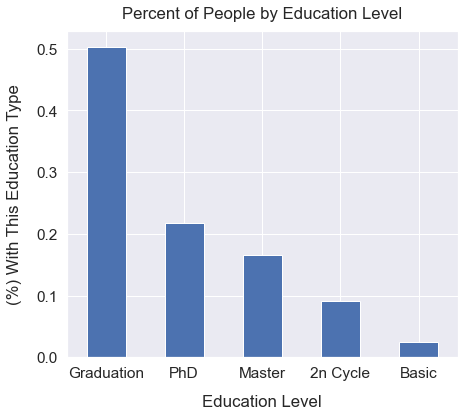

In [40]:
sns.set(font_scale=1.4)
df['Education'].value_counts(normalize=True).plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Education Level", labelpad=14)
plt.ylabel("(%) With This Education Type", labelpad=14)
plt.title("Percent of People by Education Level", y=1.02);

In [41]:
# More than half are seeing someone.
df['Marital_Status'].value_counts(normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
YOLO        0.000893
Absurd      0.000893
Name: Marital_Status, dtype: float64

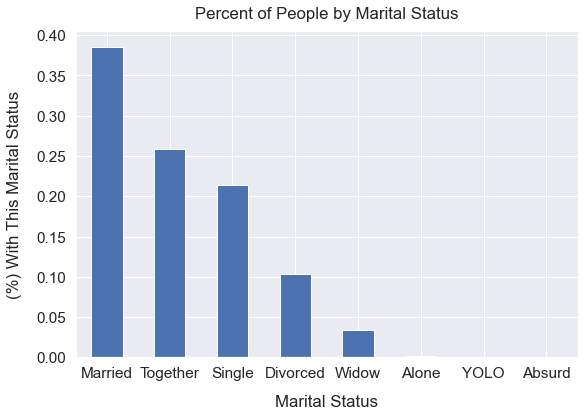

In [42]:
sns.set(font_scale=1.4)
df['Marital_Status'].value_counts(normalize=True).plot(kind='bar', figsize=(9,6), rot=0)
plt.xlabel("Marital Status", labelpad=14)
plt.ylabel("(%) With This Marital Status", labelpad=14)
plt.title("Percent of People by Marital Status", y=1.02);

In [43]:
# Majority don't have children and if they do it's 1 child at most.
df['Kidhome'].value_counts(normalize=True)

0    0.577232
1    0.401339
2    0.021429
Name: Kidhome, dtype: float64

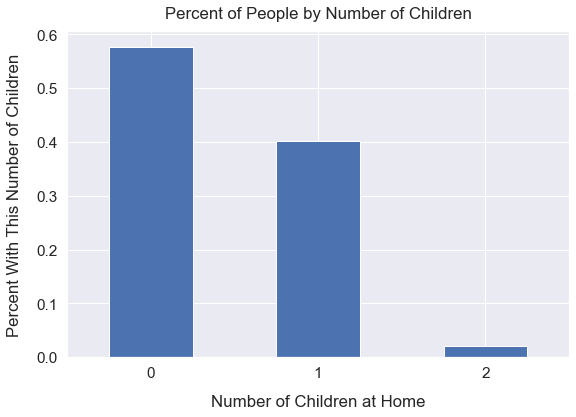

In [44]:
sns.set(font_scale=1.4)
df['Kidhome'].value_counts(normalize=True).plot(kind='bar', figsize=(9,6), rot=0)
plt.xlabel("Number of Children at Home", labelpad=14)
plt.ylabel("Percent With This Number of Children", labelpad=14)
plt.title("Percent of People by Number of Children", y=1.02);

#### Which products are performing best?

- Wines sells the best with customers spending on average $303.93 on wine
- Followed by gold, meat, fish and sweet products.

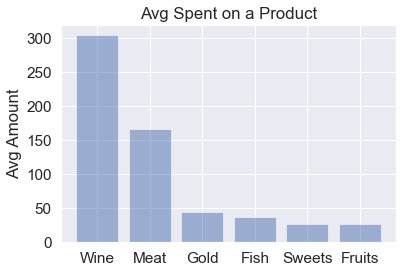

In [45]:
objects = ('Wine', 'Meat', 'Gold', 'Fish', 'Sweets', 'Fruits')
y_pos = np.arange(len(objects))
performance = [303.93, 166.95, 44.02, 37.52, 27.06, 26.30]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Avg Amount')
plt.title('Avg Spent on a Product')

plt.show()

In [46]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.149107,0.009375
std,3246.662198,11.984069,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.356274,0.096391
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2828.250000,1959.000000,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,5458.500000,1970.000000,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8427.750000,1977.000000,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


 #### Which channels are underperforming?